In [9]:
import matplotlib.pyplot as plt
import perfplot
from datetime import datetime, timedelta

# Run other ipynb file to have access to its functions
%run Gorilla_random_generator.ipynb
%run Gorilla_functions_clean.ipynb

# import rate data
rate_data = pd.read_excel('gorilla_test_data.xlsx', sheet_name='rate_table')
rate_data['date'] = pd.to_datetime(rate_data['date'], errors='coerce', infer_datetime_format=True)

def calculate_end_date(start_date, duration_days):
    # Convert the start date to a datetime object
    start_date_dt = datetime.strptime(start_date, '%Y-%m-%d')

    # Calculate the end date by adding the duration in days
    end_date_dt = start_date_dt + timedelta(days=duration_days)

    # Format the end date as a string in the same format as the input
    end_date_str = end_date_dt.strftime('%Y-%m-%d')

    return end_date_str

def random_results(n_amount_meters, n_amount_days, start_date="2020-04-01"): 
    random_meters = generate_random_meters(n_amount_meters)
    mock_consumption_data = generate_mock_consumption_data(random_meters, start_date, n_amount_days)
    end_date = calculate_end_date(start_date, n_amount_days)
    meter_ids_list = random_meters['meter_id'].to_list()
    df_results_random = get_results_for_multiple_ids(random_meters, meter_ids_list, mock_consumption_data, rate_data, start_date, end_date)

    return df_results_random

def benchmark_random_results(meters_range, days_range):

    n_amount_meters_range = range(1, meters_range + 1) # Define the range of meters and duration
    duration_range = range(1, days_range + 1)  # Duration ranging from 1 to 10 days

    # Benchmark the random_results function
    perfplot.show(
        setup=lambda n: n,  # Input size is the duration
        n_range=duration_range,
        equality_check=False,  # Disable equality check
        kernels=[
            lambda n: random_results(n_meters, n)  # Wrap the call in a lambda
            for n_meters in n_amount_meters_range
        ],
        labels=[f"{n} meters" for n in n_amount_meters_range],
        xlabel="Duration (days)",
        title="Benchmarking random_results function",
    )


In [10]:
# Test random results
random_results(10, 100).head()

,meter_id,total_kwh,total_charge_pounds
0,26732704,9693.155346,19.15
1,27716090,9869.895380,28.39
2,47213376,9760.835347,23.47
3,58199137,9444.237100,28.97
4,62362214,9947.150942,24.59


Output()

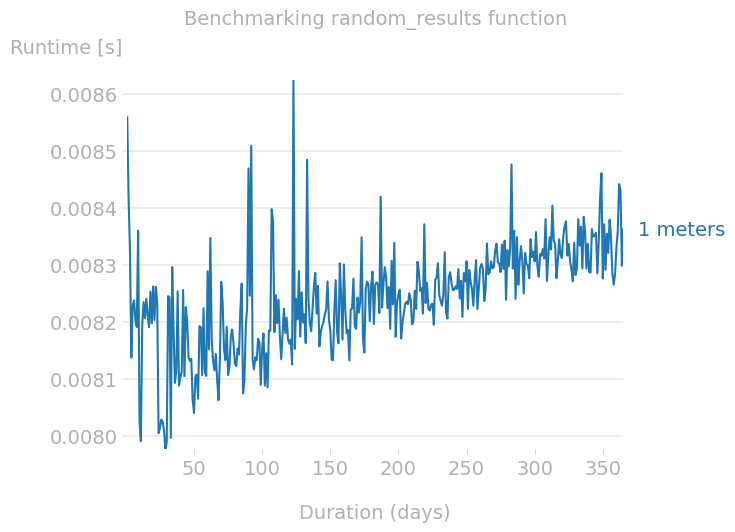

In [16]:
# Call the benchmark function
benchmark_random_results(1, 365)

Output()

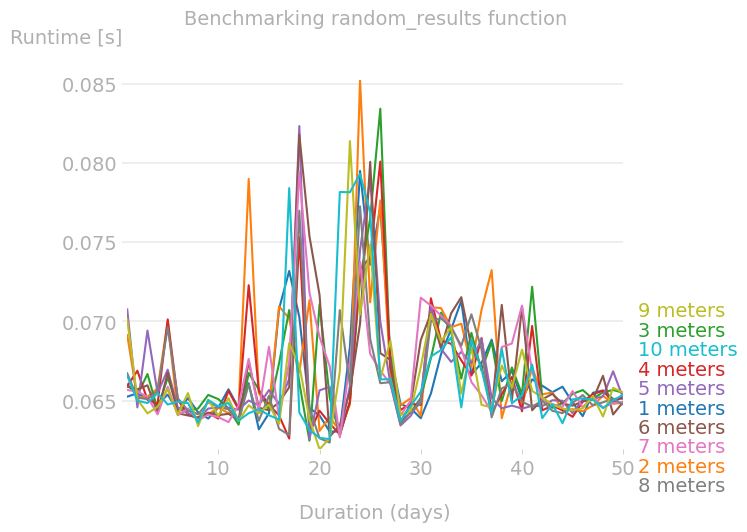

In [12]:
# Call the benchmark function
benchmark_random_results(10, 50)

Output()

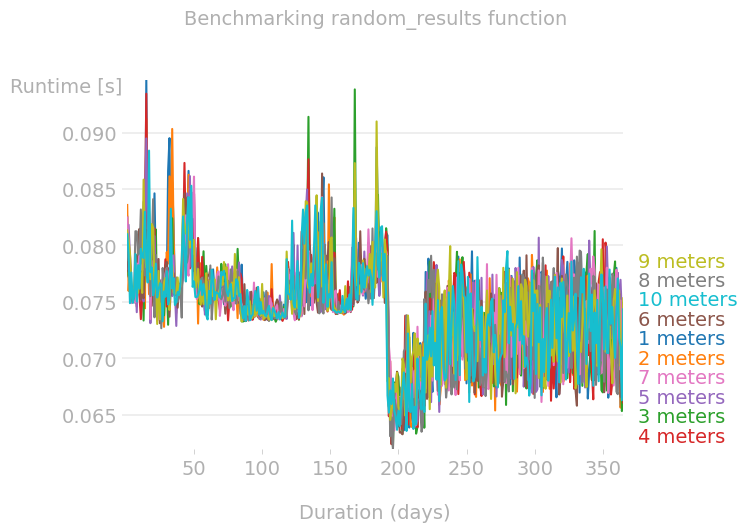

In [15]:
# Call the benchmark function
benchmark_random_results(10, 365)